In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 5.5 MB/s 


In [5]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# Tensorflow for word embedding
import tensorflow as tf

from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Embedding, Flatten,Dense
from tensorflow import keras

import tensorflow_addons as tfa
from random import shuffle
from keras import backend as K

#

from sklearn.utils import class_weight

In [6]:
#Convert train jason file to csv file
train_file_path = "/content/drive/MyDrive/assign2/comp90051-22-s2-authorship/train.json"
with open(train_file_path, encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)
    
df.to_csv('train.csv', encoding='utf-8', index=False)

In [7]:
#Convert test jason file to csv file
test_file_path = "/content/drive/MyDrive/assign2/comp90051-22-s2-authorship/test.json"
with open(test_file_path, encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)
    
df.to_csv('test.csv', encoding='utf-8', index=False)

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
print(df_train.iloc[1])
df_train

authors                                     [1359, 15881, 45]
year                                                       15
abstract    [40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...
venue                                                     2.0
title       [1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3...
Name: 1, dtype: object


,authors,year,abstract,venue,title
0,"[42, 13720, 36]",9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20.0,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1..."
1,"[1359, 15881, 45]",15,"[40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...",2.0,"[1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3..."
2,"[19166, 17763]",17,"[40, 1542, 1691, 2449, 1535, 2610, 1543, 1535,...",NaN,"[2085, 1719, 1846, 1745, 2243, 1553, 1606, 159..."
3,[97],10,"[46, 1624, 1547, 56, 1687, 1644, 6, 7, 3386, 1...",4.0,"[40, 1733, 1735, 1540, 1655, 46, 1624, 1547, 5..."
4,"[19617, 2]",10,"[37, 3709, 3836, 1586, 2151, 1727, 3021, 1860,...",9.0,"[38, 1592, 2088, 1543, 1574, 1727, 1597, 1813,..."
...,...,...,...,...,...
25788,"[1797, 78]",14,"[46, 1605, 1681, 10, 1557, 4741, 1535, 2021, 1...",1.0,"[46, 1910, 36, 2107, 1547, 1553, 1716, 1528, 5..."
25789,"[18357, 11563, 7905]",11,"[46, 1605, 1691, 10, 2551, 4168, 2030, 3134, 1...",278.0,"[47, 1574, 1541, 1549, 47, 1966, 2114, 112, 12..."
25790,"[2236, 20436, 10501]",7,"[1611, 1543, 1535, 2817, 2073, 1647, 11, 2933,...",17.0,"[56, 1718, 3012, 56, 1902, 2160, 1546, 1623, 1..."
25791,"[3921, 8760]",16,"[37, 1662, 33, 2007, 1669, 4981, 1650, 1527, 1...",0.0,"[3066, 1728, 11, 1546, 11, 3066, 1728, 1531, 1..."


In [ ]:
print(df_test.iloc[1])
df_test

identifier                                                    1
coauthors                                        [21189, 14088]
year                                                         19
abstract      [1731, 2130, 3674, 1705, 1656, 3077, 1546, 367...
venue                                                     223.0
title         [40, 1560, 1536, 1544, 1609, 1705, 1658, 1543,...
Name: 1, dtype: object


,identifier,coauthors,year,abstract,venue,title
0,0,"[16336, 1762, 4357, 12564]",19,"[37, 1662, 3207, 10, 33, 2037, 1738, 1642, 155...",223.0,"[3207, 24, 1798, 1738, 37, 2375, 1568, 11, 53,..."
1,1,"[21189, 14088]",19,"[1731, 2130, 3674, 1705, 1656, 3077, 1546, 367...",223.0,"[40, 1560, 1536, 1544, 1609, 1705, 1658, 1543,..."
2,2,"[3625, 1198, 19889, 794, 2749, 7801]",19,"[1551, 1728, 3920, 1542, 1535, 1656, 1543, 153...",7.0,"[47, 1574, 1729, 1641, 11, 37, 2533, 2015, 47,..."
3,3,"[19810, 15173, 5876, 111]",19,"[51, 1535, 2115, 1543, 1811, 1700, 1657, 1684,...",21.0,"[1770, 53, 2054, 1549, 1529, 1723, 2796, 1547,..."
4,4,"[10932, 7668, 11907, 19601, 15307, 10492, 1049...",19,"[1775, 1746, 1842, 1525, 33, 2551, 1882, 1542,...",NaN,"[18, 1924, 23, 1544, 3927, 2686, 1543, 1535, 1..."
...,...,...,...,...,...,...
795,795,"[2964, 9493]",19,"[1657, 1533, 1681, 1527, 1667, 2295, 1916, 236...",223.0,"[2796, 1547, 1531, 1550, 2370, 51, 1549, 2600,..."
796,796,"[6305, 4866, 5741, 15334]",19,"[1618, 1552, 1630, 2367, 1613, 3600, 1857, 155...",0.0,"[37, 1747, 2188, 11, 3623, 57, 2103, 1555, 37,..."
797,797,"[4856, 5063]",19,"[37, 1662, 33, 2095, 1726, 2090, 1553, 2410, 2...",0.0,"[1621, 11, 1560, 1816, 2151, 1533, 1534, 37, 1..."
798,798,"[18095, 2884, 15373]",19,"[46, 2337, 11, 2116, 2185, 1839, 3154, 3057, 1...",460.0,"[1832, 1552, 10, 3585, 10, 35, 1889, 1597, 425..."


In [ ]:
train_name = df_train.columns
print(train_name)
print(df_train.dtypes)

Index(['authors', 'year', 'abstract', 'venue', 'title'], dtype='object')
authors      object
year          int64
abstract     object
venue       float64
title        object
dtype: object


In [ ]:
test_name = df_test.columns
print(test_name)
print(df_test.dtypes)

Index(['identifier', 'coauthors', 'year', 'abstract', 'venue', 'title'], dtype='object')
identifier      int64
coauthors      object
year            int64
abstract       object
venue         float64
title          object
dtype: object


# Convert string to list type

In [ ]:
# define the function for changing the data type from string to list

def convert_list_type(list):
    converted_list = []
    for i in list:
        i.strip('')
        i = ast.literal_eval(i)
        converted_list.append(i)
    return converted_list

## Pre-processing for authors column (Extract prolific author as the training label)


In [ ]:

train_authors_number = df_train['authors'].to_list()
train_author_list = convert_list_type(train_authors_number)

# find prolific author from the authors column    
prolific_author = []
for i in train_author_list:
    prolific_author_per_index = []
    for j in i:
        if j >= 0 and j < 100:
            prolific_author_per_index.append(j)
    if len(prolific_author_per_index) == 0:
        prolific_author_per_index.append(101)
    prolific_author.append(prolific_author_per_index)



# find non-prolific author from the authors column
non_prolific_author = []
sum_zero_len = 0
for i in train_author_list:
    non_prolific_author_per_index = []
    for j in i:
        if j >= 100:
            non_prolific_author_per_index.append(j)
    if len(non_prolific_author_per_index) == 0:
        non_prolific_author_per_index.append(101)
        sum_zero_len += 1
    non_prolific_author.append(non_prolific_author_per_index)                   
print(sum_zero_len)

# Generate the training label
train_label = prolific_author            
            

print(train_label)      

385
[[42, 36], [45], [101], [97], [2], [101], [101], [101], [101], [44, 2], [97], [101], [76], [101], [101], [101], [101], [101], [101], [78], [101], [101], [49], [101], [49], [101], [101], [101], [101], [101], [101], [101], [101], [101], [101], [32], [58], [101], [101], [101], [95], [101], [0], [101], [14], [4], [101], [101], [101], [101], [9, 30], [47], [101], [28, 15], [94], [101], [83], [101], [101], [24], [47], [101], [16], [101], [101], [101], [10], [101], [101], [31], [101], [101], [101], [101], [101], [101], [33], [101], [101], [50], [101], [101], [101], [65], [101], [101], [101], [88], [101], [101], [74], [39], [96], [101], [101], [101], [101], [101], [101], [101], [26], [101], [32], [101], [101], [34, 0, 37], [101], [36], [101], [101], [75], [82], [101], [71, 13], [101], [101], [101], [15], [101], [101], [33], [101], [7, 19], [101], [101], [101], [99], [101], [101], [101], [52, 65], [101], [101], [101], [21], [101], [101], [101], [69], [69], [39], [101], [5], [101], [42], [10

In [ ]:
# Remove the orginal authors and add new non prolific author as new feature
df_train['coauthors'] = non_prolific_author
df_train.drop(['authors'],axis = 1,inplace= True)
df_train


,year,abstract,venue,title,coauthors
0,9,"[2455, 1858, 2335, 1543, 1800, 1860, 2000, 286...",20.0,"[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1...",[13720]
1,15,"[40, 1542, 1691, 2449, 1535, 3616, 2206, 1904,...",2.0,"[1731, 47, 11, 57, 4624, 1525, 1535, 47, 11, 3...","[1359, 15881]"
2,17,"[40, 1542, 1691, 2449, 1535, 2610, 1543, 1535,...",NaN,"[2085, 1719, 1846, 1745, 2243, 1553, 1606, 159...","[19166, 17763]"
3,10,"[46, 1624, 1547, 56, 1687, 1644, 6, 7, 3386, 1...",4.0,"[40, 1733, 1735, 1540, 1655, 46, 1624, 1547, 5...",[101]
4,10,"[37, 3709, 3836, 1586, 2151, 1727, 3021, 1860,...",9.0,"[38, 1592, 2088, 1543, 1574, 1727, 1597, 1813,...",[19617]
...,...,...,...,...,...
25788,14,"[46, 1605, 1681, 10, 1557, 4741, 1535, 2021, 1...",1.0,"[46, 1910, 36, 2107, 1547, 1553, 1716, 1528, 5...",[1797]
25789,11,"[46, 1605, 1691, 10, 2551, 4168, 2030, 3134, 1...",278.0,"[47, 1574, 1541, 1549, 47, 1966, 2114, 112, 12...","[18357, 11563, 7905]"
25790,7,"[1611, 1543, 1535, 2817, 2073, 1647, 11, 2933,...",17.0,"[56, 1718, 3012, 56, 1902, 2160, 1546, 1623, 1...","[2236, 20436, 10501]"
25791,16,"[37, 1662, 33, 2007, 1669, 4981, 1650, 1527, 1...",0.0,"[3066, 1728, 11, 1546, 11, 3066, 1728, 1531, 1...","[3921, 8760]"


# Pre-processing for abstract and title column (string to list) [both train and test]

In [ ]:
#Train
train_abstract = df_train['abstract'].to_list()
abstract_list = convert_list_type(train_abstract)
train_title = df_train['title'].to_list()
title_list = convert_list_type(train_title)

abstract_title = [i + j for i, j in zip(title_list, abstract_list)]

#Test
test_abstract = df_test['abstract'].to_list()
test_abstract_list = convert_list_type(test_abstract)
test_title = df_test['title'].to_list()
test_title_list = convert_list_type(test_title)

test_abstract_title = [i + j for i, j in zip(test_title_list, test_abstract_list)]


In [ ]:
print(len(abstract_list[0]))
print(abstract_list[0])
print(len(title_list[0]))
print(title_list[0])
print(len(abstract_title[0]))
print(abstract_title[0])

print('\nTest')
print(len(test_abstract_list[0]))
print(test_abstract_list[0])
print(len(test_title_list[0]))
print(test_title_list[0])
print(len(test_abstract_title[0]))
print(test_abstract_title[0])

87
[2455, 1858, 2335, 1543, 1800, 1860, 2000, 2867, 1546, 1874, 2059, 1525, 2590, 4196, 12, 2634, 1543, 1800, 1586, 2866, 3595, 1866, 1670, 2000, 3743, 1542, 1650, 1527, 33, 4407, 1543, 1535, 1962, 1961, 1543, 33, 1700, 1543, 1535, 1647, 1546, 1580, 4720, 12, 1731, 4231, 2601, 1553, 1704, 1605, 2456, 1543, 3281, 1594, 4407, 2168, 1542, 1586, 3781, 2471, 1525, 1859, 1669, 2512, 4572, 1546, 1609, 3781, 2471, 1525, 3393, 12, 37, 1712, 1586, 4196, 1650, 1527, 3281, 1594, 4407, 1800, 4708, 1904, 2059, 2411, 12]
16
[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1539, 1715, 1553, 1541, 1536, 1532, 1872, 1538]
103
[41, 1550, 1563, 1594, 1544, 1919, 1644, 37, 1539, 1715, 1553, 1541, 1536, 1532, 1872, 1538, 2455, 1858, 2335, 1543, 1800, 1860, 2000, 2867, 1546, 1874, 2059, 1525, 2590, 4196, 12, 2634, 1543, 1800, 1586, 2866, 3595, 1866, 1670, 2000, 3743, 1542, 1650, 1527, 33, 4407, 1543, 1535, 1962, 1961, 1543, 33, 1700, 1543, 1535, 1647, 1546, 1580, 4720, 12, 1731, 4231, 2601, 1553, 1704, 1605, 245

## Plot histrogram for getting a great understanding of the **distribution of the abstract length and title length (for training)**

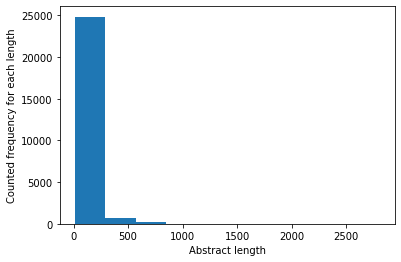

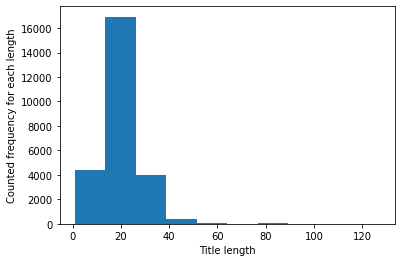

In [ ]:
abstract_length = [len(i) for i in abstract_list]
title_length = [len(i) for i in title_list]

abstract_dict = Counter(abstract_length)
# print(abstract_dict)
title_dict = Counter(title_length)
# print(title_dict) 

plt.hist(abstract_length)
plt.xlabel("Abstract length")
plt.ylabel("Counted frequency for each length")
plt.show()

plt.hist(title_length)
plt.xlabel("Title length")
plt.ylabel("Counted frequency for each length")
plt.show()


# Pre-processing for getting one-hot encoding label of the prolific author and the relative labels distribution

dict_keys([36, 42, 45, 100, 97, 2, 44, 76, 78, 49, 32, 58, 95, 0, 14, 4, 9, 30, 47, 15, 28, 94, 83, 24, 16, 10, 31, 33, 50, 65, 88, 74, 39, 96, 26, 34, 37, 75, 82, 13, 71, 7, 19, 99, 52, 21, 69, 5, 70, 20, 1, 57, 53, 81, 92, 29, 85, 12, 59, 38, 6, 23, 98, 25, 18, 77, 87, 79, 11, 61, 46, 84, 17, 41, 43, 54, 62, 3, 89, 90, 40, 73, 8, 67, 55, 64, 80, 27, 56, 51, 35, 66, 72, 22, 68, 60, 63, 91, 86, 48, 93])
[  113    54   106 18333    99    75    74    65   141    80   126    72
    72   125    69    75    52    76   166   143    97    66   114    90
   122   163   108    74    93   116    48   118    97    62   192    60
    85   110    77    87    62    86   135    58    60   101    92    73
    64    55    53   114   183   107   100    71    94   152    99   108
   117    68    94   155    56   119   100   105   124    87    87   143
    79   140    64    42    67    55    59    71    81    77    66   113
    63    75    49   115    76    53    68    84    81    76    83    38
    66   

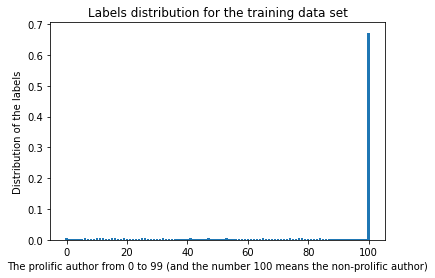

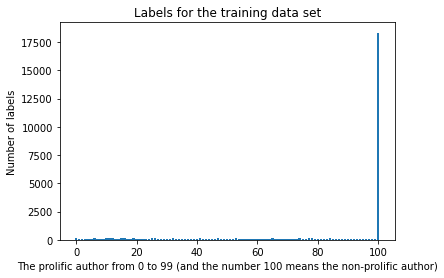

In [ ]:
multilable_binarizer = MultiLabelBinarizer()
one_hot_encoded_label_with_one_more_column = multilable_binarizer.fit_transform(train_label).astype('float')
# One-hot encoded label(0 to 99 total length is 100)
one_hot_encoded_label = [i[:99].tolist() for i in one_hot_encoded_label_with_one_more_column]
# #One-hot encoded abstract (1 to 4999)
# one_hot_encoded_abstract = multilable_binarizer.fit_transform(abstract_list)
# #One-hot encoded title (1 to 4999)
# one_hot_encoded_title = multilable_binarizer.fit_transform(title_list)
# print(one_hot_encoded_abstract.shape)
# print(one_hot_encoded_title.shape)    

# df = pd.DataFrame(mlb.fit_transform(df['genre']),columns=mlb.classes_)
# print(one_hot_encoded_label_with_one_more_column)
# print(one_hot_encoded_label)


label_distribution = {}
for i in one_hot_encoded_label_with_one_more_column:
  for j in range(101):
    if i[j] == 1:
      label_distribution[j] = label_distribution.get(j, 0) + 1


label_distribution
keys = label_distribution.keys()
vals = label_distribution.values()

label_distribution_prob = np.array(list(vals))/np.sum(np.array(list(vals)))
total_number_instances = np.sum(np.array(list(vals)))
label_distribution = np.array(list(vals))
print(keys)
print(label_distribution)
print(label_distribution_prob)

plt.bar(keys, label_distribution_prob, label="Real distribution of labels")
plt.title('Labels distribution for the training data set')
plt.xlabel('The prolific author from 0 to 99 (and the number 100 means the non-prolific author)')
plt.ylabel('Distribution of the labels')
plt.show()

plt.bar(keys, label_distribution, label="Number of labels")
plt.title('Labels for the training data set')
plt.xlabel('The prolific author from 0 to 99 (and the number 100 means the non-prolific author)')
plt.ylabel('Number of labels')
plt.show()


## Pre-processing for getting word embedding abstract & title

In [ ]:
#Padding & truncating for making same abstract length

# abstract_max_length = 512

# padded_abstract = pad_sequences(abstract_list,truncating = 'post',maxlen = abstract_max_length,padding ='post')
# test_padded_abstract = pad_sequences(test_abstract_list,truncating = 'post',maxlen = abstract_max_length,padding ='post')
# print(padded_abstract.shape)
# print(test_padded_abstract.shape)

# # Padding & truncating for making same title length
# title_max_length = 50

# padded_title = pad_sequences(title_list,truncating = 'post',maxlen = title_max_length,padding ='post')
# test_padded_title = pad_sequences(test_title_list,truncating = 'post',maxlen = title_max_length,padding ='post')
# print(padded_title.shape)
# print(test_padded_title.shape)

max_length_abstract_title = 512
padded_abstract_title = pad_sequences(abstract_title,truncating = 'post',maxlen = max_length_abstract_title,padding ='post')

test_padded_abstract_title = pad_sequences(test_abstract_title,truncating = 'post',maxlen = max_length_abstract_title,padding ='post')



# Split the train and validation set for abstract and title

In [ ]:
# split the train set to train set and validation set
X_train, X_val, y_train, y_val = train_test_split(padded_abstract_title, one_hot_encoded_label_with_one_more_column, test_size = 0.2, random_state = 1)

In [ ]:
def calculating_class_weights(y_true):
    from sklearn.utils.class_weight import compute_class_weight
    number_dim = np.shape(y_true)[1]
    weights = np.empty([number_dim, 2])
    for i in range(number_dim):
        weights[i] = compute_class_weight(class_weight ='balanced', classes = np.unique(y_true[:, i]), y = y_true[:, i])
    return weights

weights = calculating_class_weights(one_hot_encoded_label_with_one_more_column)
# print(weights)
def get_weighted_loss(weights):
    def weighted_loss(y_true, y_pred):
        return K.mean((weights[:,0]**(1-y_true))*(weights[:,1]**(y_true))*K.binary_crossentropy(y_true, y_pred), axis=-1)
    return weighted_loss





embedding_dimension = 128
vocabulary_size = 5000
embedding_model = tf.keras.Sequential([
    layers.Embedding(input_dim = vocabulary_size, output_dim = embedding_dimension,input_length = max_length_abstract_title),
    layers.GlobalAveragePooling1D(),
    # layers.Flatten(),
    # layers.Dense(512,activation = 'relu'),
    layers.Dense(101,activation = 'sigmoid')
    
])
embedding_model.summary()
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
# metric = tfa.metrics.F1Score(num_classes=101, threshold=0.5, average= 'micro' )
loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=2,from_logits=False)
#metrics= ['categorical_accuracy']
optimizer = optimizers.Adam(learning_rate =0.001)
embedding_model.compile(loss= get_weighted_loss(weights), optimizer= optimizer, metrics = [f1])
# print(X_train.shape)
# print(X_train)
# print(y_train.shape)

# print(y_train.astype(np.float32))


history = embedding_model.fit(X_train, y_train, epochs = 40, validation_data=(X_val,y_val),batch_size= 64)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 512, 128)          640000    
                                                                 
 global_average_pooling1d_14  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_14 (Dense)            (None, 101)               13029     
                                                                 
Total params: 653,029
Trainable params: 653,029
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
323/323 [==============================] - 2s 5ms/step - loss: 0.6961 - f1: 0.0168 - val_loss: 0.6803 - val_f1: 0.0078
Epoch 2/40
323/323 [==============================] - 2s 5ms/step - loss: 0.6919 - f1: 0.0249 - val_loss: 0.6761 - 

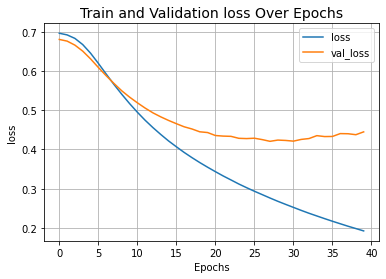

In [ ]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()
plot_result("loss")

In [ ]:
embedding_model.layers[0].get_weights()[0]

array([[ 0.06634308,  0.027171  ,  0.0506704 , ...,  0.02917721,
         0.01509635, -0.02332591],
       [ 0.54638654,  0.9141883 ,  0.9309582 , ...,  0.14315471,
         0.9513578 , -1.1177287 ],
       [ 0.52166504, -0.35804865, -0.17649743, ..., -0.2490543 ,
        -0.6094479 ,  0.6323525 ],
       ...,
       [ 1.67107   , -1.4398208 , -0.57125145, ..., -0.6738258 ,
         0.5366666 , -0.20657791],
       [-0.37601003, -1.5184736 , -1.5730616 , ..., -0.1319026 ,
         0.71410924,  1.0369354 ],
       [ 0.9096259 , -0.60913354,  0.97664183, ..., -0.31403908,
         0.47772565,  0.6235839 ]], dtype=float32)

In [ ]:
output_flatten_model = keras.Model(inputs = embedding_model.input,outputs=embedding_model.layers[1].output)

In [ ]:
train_embedded_abstract_title = output_flatten_model(padded_abstract_title)
print(train_embedded_abstract_title.shape)
print(train_embedded_abstract_title[0])

(25793, 128)
tf.Tensor(
[ 0.07941916  0.0307935   0.01727567  0.02501705 -0.06532347  0.02537765
  0.05550168  0.02726104  0.0253594  -0.11600976  0.01777921 -0.06735255
  0.01655998  0.03389009  0.07816574  0.05085765 -0.04127408  0.01012612
  0.08652181 -0.05397521 -0.01889135 -0.01012657 -0.07477676 -0.01821455
 -0.01314138 -0.00649725  0.00108198 -0.11609221 -0.0862809  -0.09124883
 -0.07816943  0.01876782  0.00632747  0.02640592 -0.00817087  0.04133357
  0.05945649  0.10539878 -0.04761225 -0.09364913 -0.05223012  0.11353429
  0.0385301   0.03535748  0.05187627 -0.05186232  0.0365515   0.09801965
 -0.03481499 -0.02945392  0.12320109 -0.03570059  0.00458216  0.03471064
 -0.04490625  0.11470165  0.0854165   0.03620416  0.05267128 -0.01198789
  0.04990082  0.05443878  0.04872569 -0.0219875   0.04261533  0.04702203
 -0.00095005  0.08572903 -0.00315356  0.03621012  0.0404569   0.00811855
 -0.03373229 -0.04766034  0.05964201  0.07387411  0.02938643 -0.02518023
  0.07454029  0.01081259  0

In [ ]:
test_embedded_abstract_title = output_flatten_model(test_padded_abstract_title)
print(test_embedded_abstract_title.shape)
print(test_embedded_abstract_title[0])

(800, 128)
tf.Tensor(
[ 0.06076358 -0.04551058 -0.01871236  0.0427676  -0.04329352  0.04344029
  0.04780163  0.00762339 -0.08615971 -0.07226295 -0.06071903 -0.04984209
  0.09376772  0.09799503  0.12179315  0.15846038 -0.01861119  0.05893488
  0.00996553 -0.02821621 -0.0818134   0.0107044  -0.02909708  0.01746513
 -0.04175233  0.05563569 -0.00740184 -0.09653378 -0.04478486 -0.04413483
 -0.07444485  0.05016769 -0.05164603 -0.03164419 -0.03382712 -0.01720409
  0.10973962  0.08870415  0.0643995  -0.10738191 -0.0216794   0.08386601
  0.00641079  0.12374645  0.07298301 -0.0152814   0.10893599  0.08585887
 -0.01967346  0.02029273  0.0996991  -0.07404275  0.00499918 -0.02374568
 -0.08516438  0.09849744  0.10587534  0.04094901  0.10566716 -0.09185715
 -0.03447535  0.1274002   0.12296443  0.06157116 -0.05037583  0.06337458
 -0.04301852  0.09894394 -0.03375017  0.11605951 -0.01546091 -0.0087425
 -0.06627795 -0.08250797  0.02562868  0.09147093  0.00499056  0.03461604
  0.09547359  0.0181645   0.02

In [ ]:
numpy_train_text = train_embedded_abstract_title.numpy()
numpy_test_text = test_embedded_abstract_title.numpy()

In [ ]:
header_features_name = np.array(['text_feature ' + str(i) for i in range(128)])
header_features_name

array(['text_feature 0', 'text_feature 1', 'text_feature 2',
       'text_feature 3', 'text_feature 4', 'text_feature 5',
       'text_feature 6', 'text_feature 7', 'text_feature 8',
       'text_feature 9', 'text_feature 10', 'text_feature 11',
       'text_feature 12', 'text_feature 13', 'text_feature 14',
       'text_feature 15', 'text_feature 16', 'text_feature 17',
       'text_feature 18', 'text_feature 19', 'text_feature 20',
       'text_feature 21', 'text_feature 22', 'text_feature 23',
       'text_feature 24', 'text_feature 25', 'text_feature 26',
       'text_feature 27', 'text_feature 28', 'text_feature 29',
       'text_feature 30', 'text_feature 31', 'text_feature 32',
       'text_feature 33', 'text_feature 34', 'text_feature 35',
       'text_feature 36', 'text_feature 37', 'text_feature 38',
       'text_feature 39', 'text_feature 40', 'text_feature 41',
       'text_feature 42', 'text_feature 43', 'text_feature 44',
       'text_feature 45', 'text_feature 46', 'text

In [ ]:
train_text_features = np.vstack([header_features_name,numpy_train_text])
test_text_features = np.vstack([header_features_name,numpy_test_text])

In [ ]:
df_train_text_features = pd.DataFrame(train_text_features[1:],columns=train_text_features[0])
df_test_text_features = pd.DataFrame(test_text_features[1:],columns=train_text_features[0])

In [ ]:
one_hot_encoded_label_with_one_more_column[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# df_train_text_features['prolific_author'] = [i for i in one_hot_encoded_label_with_one_more_column]
# labels = {'prolific_author':one_hot_encoded_label_with_one_more_column}
# df_train_text_features.insert(33,'prolific_author',one_hot_encoded_label_with_one_more_column,True)

In [ ]:
df_train_text_features = df_train_text_features.astype('float')

print(df_train_text_features.dtypes)
df_train_text_features

text_feature 0      float64
text_feature 1      float64
text_feature 2      float64
text_feature 3      float64
text_feature 4      float64
                     ...   
text_feature 123    float64
text_feature 124    float64
text_feature 125    float64
text_feature 126    float64
text_feature 127    float64
Length: 128, dtype: object


,text_feature 0,text_feature 1,text_feature 2,text_feature 3,text_feature 4,text_feature 5,text_feature 6,text_feature 7,text_feature 8,text_feature 9,...,text_feature 118,text_feature 119,text_feature 120,text_feature 121,text_feature 122,text_feature 123,text_feature 124,text_feature 125,text_feature 126,text_feature 127
0,0.079419,0.030794,0.017276,0.025017,-0.065323,0.025378,0.055502,0.027261,0.025359,-0.116010,...,0.014556,0.032201,0.047892,0.042603,0.006532,0.018470,0.055988,0.022512,0.060155,-0.106122
1,0.068017,0.036980,0.005832,0.042792,-0.011677,0.015222,0.019384,-0.058896,0.071564,-0.024717,...,-0.011472,-0.009122,0.010404,-0.015518,0.024546,-0.008884,0.016092,0.032492,-0.024283,-0.082449
2,0.046387,0.039519,0.026032,-0.054630,-0.078195,0.038710,0.086609,-0.031877,0.028143,-0.094039,...,0.011861,0.064571,0.098134,0.072945,0.055703,0.032845,0.074581,0.068994,0.040276,-0.114409
3,0.028028,-0.020790,-0.027923,0.042166,-0.004179,0.066414,0.050734,-0.012573,-0.026342,-0.004099,...,0.034384,-0.012254,0.023538,-0.018654,0.054023,0.013682,0.002530,0.068615,0.044944,-0.025748
4,0.083030,-0.005313,0.037347,0.040607,-0.098388,0.031640,-0.007483,0.001366,0.047076,-0.061400,...,-0.016369,0.057688,0.002440,0.027857,-0.020400,-0.024394,0.083037,-0.031422,0.084902,-0.132718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,0.149896,0.004667,-0.040696,0.115339,-0.013519,-0.022942,-0.037623,0.006910,0.029821,-0.052528,...,0.030409,-0.029943,-0.030181,-0.035131,-0.007499,-0.125405,0.010609,-0.072545,0.003457,-0.051008
25789,0.064069,-0.192444,-0.119716,0.148314,0.048408,0.343413,0.176579,-0.153796,-0.170229,0.050573,...,0.075242,0.093674,0.131335,0.151985,0.167271,-0.071044,0.130611,0.129799,0.294833,-0.197882
25790,-0.007838,-0.059721,-0.122596,0.168578,-0.020425,0.166328,0.110523,0.069596,-0.147305,-0.046439,...,0.124043,0.032021,0.115560,0.107450,0.136872,-0.022547,0.054426,-0.000289,0.127961,-0.135284
25791,0.110305,0.048649,-0.050292,0.042819,-0.019160,0.010612,0.034127,-0.045991,0.023556,-0.026303,...,0.016000,-0.005142,-0.022849,0.010485,-0.003901,-0.010666,0.034943,0.007667,0.055435,-0.141625


In [ ]:
df_test_text_features = df_test_text_features.astype('float')
print(df_test_text_features.dtypes)
df_test_text_features


text_feature 0      float64
text_feature 1      float64
text_feature 2      float64
text_feature 3      float64
text_feature 4      float64
                     ...   
text_feature 123    float64
text_feature 124    float64
text_feature 125    float64
text_feature 126    float64
text_feature 127    float64
Length: 128, dtype: object


,text_feature 0,text_feature 1,text_feature 2,text_feature 3,text_feature 4,text_feature 5,text_feature 6,text_feature 7,text_feature 8,text_feature 9,...,text_feature 118,text_feature 119,text_feature 120,text_feature 121,text_feature 122,text_feature 123,text_feature 124,text_feature 125,text_feature 126,text_feature 127
0,0.060764,-0.045511,-0.018712,0.042768,-0.043294,0.043440,0.047802,0.007623,-0.086160,-0.072263,...,0.051673,0.043754,0.061656,-0.017227,0.018606,0.047494,-0.009843,0.097391,0.062302,-0.051638
1,0.086315,-0.150980,-0.206023,0.027069,-0.010229,0.074213,0.101847,-0.051940,-0.147284,0.055462,...,0.127658,0.037066,0.085838,-0.010947,0.095516,-0.013517,0.035057,0.030002,0.140475,-0.027019
2,0.183744,-0.055306,-0.087589,0.052279,0.005302,0.013725,0.017716,-0.088187,-0.034357,-0.019901,...,0.107538,0.031159,-0.014116,-0.039104,0.032252,-0.000651,0.108979,-0.074037,0.047269,-0.089086
3,0.081614,0.011253,0.042038,0.078039,-0.024261,-0.007620,-0.027633,-0.022821,0.051779,-0.092617,...,-0.006706,0.042614,-0.037470,-0.026402,-0.019146,-0.005109,0.058965,-0.012094,0.014822,-0.057740
4,0.120567,-0.030223,-0.113040,-0.002698,-0.056188,-0.002866,0.070117,-0.017521,-0.000012,-0.032116,...,0.034748,-0.009685,0.037943,0.020776,-0.007404,-0.054872,0.105092,-0.012537,0.014109,-0.047485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.088734,-0.075238,-0.108582,0.038700,-0.011819,0.049662,0.030249,-0.083446,-0.006468,0.022400,...,0.048459,-0.000849,0.044529,-0.018314,0.043491,-0.015834,0.008989,-0.005366,0.043524,-0.009134
796,0.116780,-0.056570,-0.158916,-0.005367,-0.015713,0.044077,0.023302,-0.050804,-0.001700,0.049532,...,0.009469,-0.059889,0.035555,0.002224,0.080606,-0.105131,0.094507,-0.030221,0.081742,-0.016899
797,0.089611,-0.036371,-0.070834,0.013266,-0.061476,0.006572,0.049301,-0.034926,-0.010796,-0.009758,...,0.072162,0.010476,0.022517,-0.041651,0.000712,0.003238,0.013322,0.050059,0.086530,-0.031841
798,0.119399,-0.059112,-0.150949,0.009744,-0.036243,0.020571,0.084312,-0.027031,-0.076294,0.021100,...,0.061358,-0.023113,0.043966,-0.012502,0.032510,-0.023680,0.098633,0.002976,0.039405,-0.074453


In [ ]:
# split the train set to train set and validation set
text_features_X_train, text_features_X_val, text_features_y_train, text_features_y_val = train_test_split(df_train_text_features, one_hot_encoded_label_with_one_more_column, test_size = 0.2)

In [ ]:
one_hot_encoded_label_with_one_more_column

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
text_features_X_train.dtypes

print(text_features_X_train.dtypes)

text_feature 0      float64
text_feature 1      float64
text_feature 2      float64
text_feature 3      float64
text_feature 4      float64
                     ...   
text_feature 123    float64
text_feature 124    float64
text_feature 125    float64
text_feature 126    float64
text_feature 127    float64
Length: 128, dtype: object


In [ ]:

classification_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu",input_dim = text_features_X_train.shape[1]),
            layers.Dropout(0.1),
            layers.Dense(400, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dropout(0.1),
            layers.Dense(200, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.1),
            layers.Dense(text_features_y_train.shape[1],activation="sigmoid"),
        ]  
    )
classification_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               66048     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 400)               205200    
                                                                 
 dense_17 (Dense)            (None, 256)               102656    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 200)               51400     
                                                                 
 dense_19 (Dense)            (None, 128)             

In [ ]:
metric_classification = tfa.metrics.F1Score(num_classes=101, threshold=0.5, average='micro')
classification_model.compile(loss=get_weighted_loss(weights), optimizer= 'adam', metrics = [f1])

In [ ]:
history_classification = classification_model.fit(text_features_X_train, text_features_y_train, epochs = 20, validation_data=(text_features_X_val,text_features_y_val),batch_size= 62)

Epoch 1/20
333/333 [==============================] - 3s 5ms/step - loss: 0.5741 - f1: 0.0529 - val_loss: 0.4379 - val_f1: 0.0548
Epoch 2/20
333/333 [==============================] - 2s 5ms/step - loss: 0.4396 - f1: 0.0586 - val_loss: 0.3864 - val_f1: 0.0585
Epoch 3/20
333/333 [==============================] - 1s 4ms/step - loss: 0.3898 - f1: 0.0667 - val_loss: 0.3837 - val_f1: 0.0858
Epoch 4/20
333/333 [==============================] - 1s 4ms/step - loss: 0.3674 - f1: 0.0715 - val_loss: 0.3719 - val_f1: 0.0477
Epoch 5/20
333/333 [==============================] - 1s 4ms/step - loss: 0.3426 - f1: 0.0778 - val_loss: 0.3565 - val_f1: 0.0621
Epoch 6/20
333/333 [==============================] - 2s 5ms/step - loss: 0.3253 - f1: 0.0854 - val_loss: 0.3399 - val_f1: 0.0854
Epoch 7/20
333/333 [==============================] - 2s 5ms/step - loss: 0.3083 - f1: 0.0889 - val_loss: 0.3307 - val_f1: 0.0959
Epoch 8/20
333/333 [==============================] - 1s 4ms/step - loss: 0.2962 - f1: 0.0

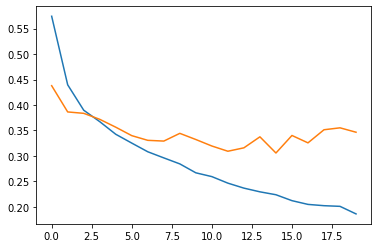

In [ ]:
plt.plot(history_classification.history['loss'], label='loss')
plt.plot(history_classification.history["val_loss"], label="val_loss")
plt.show()

In [ ]:
predicted_label = classification_model.predict(df_test_text_features)
predicted_label[predicted_label > 0.5] = 1
predicted_label[predicted_label < 0.5] = 0
predicted_label = np.asarray([np.where(i == 1) for i in predicted_label])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
predicted_label

array([[array([  5,  10,  41,  46,  47,  49,  67,  69,  70,  97, 100])],
       [array([13, 20, 22, 24, 36, 41, 43, 49, 53, 74, 84, 94, 95])],
       [array([ 6, 23, 26, 31, 48, 51, 68, 79, 81, 91])],
       [array([ 6, 23, 26, 31, 42, 48, 51, 62, 68, 71, 77, 79, 81, 83, 99])],
       [array([ 3,  8, 12, 13, 18, 22, 30, 31, 36, 37, 48, 53, 54, 60, 66, 71, 72,
               73, 74, 77, 81, 84, 86, 92, 94, 95])                               ],
       [array([ 8, 10, 12, 13, 26, 31, 36, 38, 41, 48, 51, 53, 54, 74, 77, 79, 80,
               81, 84, 86, 92, 94, 95])                                           ],
       [array([ 0,  6, 19, 23, 34, 37, 39, 42, 47, 50, 53, 71, 78, 79, 82])],
       [array([ 6, 12, 13, 18, 23, 26, 31, 42, 48, 51, 54, 62, 71, 74, 77, 79, 81,
               83, 86, 99])                                                       ],
       [array([ 2,  9, 18, 22, 30, 37, 64, 71, 74, 81, 82, 86])],
       [array([13, 16, 19, 31, 33, 36, 37, 42, 48, 51, 53, 62, 63, 66, 71

[(array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array